## Importing all of the branch history data

In [68]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt

connect_str = "dbname='research' user='jupyter' host='192.168.1.22' password='jupyter'"
connection = ps.connect(connect_str)
cursor = connection.cursor()

### General Branch Outcome Frequency

This data show the most difference in actual brancg outcomes, not predictions. The expected result is that typically, the branch will not be taken (i.e. Branch Outcome = False).

Branch outcome is False: 0.60% of the time


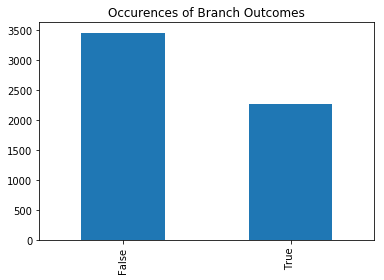

In [4]:
cursor.execute("""SELECT branch_outcome FROM branch_history;""")
rows = cursor.fetchall()
df = pd.DataFrame(rows)
branch_occurrence_outcomes = pd.DataFrame(df[0].value_counts())
branch_occurrence_outcomes.plot.bar()
plt.title('Occurences of Branch Outcomes')
#plt.xlabel('Branch Outcome')
#plt.ylabel('Occurrences')
plt.legend().set_visible(False)
false_percentage = branch_occurrence_outcomes.iloc[0]/(branch_occurrence_outcomes.iloc[1] + branch_occurrence_outcomes.iloc[0])
print("Branch outcome is False: {0:.2f}% of the time".format(false_percentage[0]))

### General Instruction Frequency

This data represents the most frequently occurring instructions that occur throughout program execution.

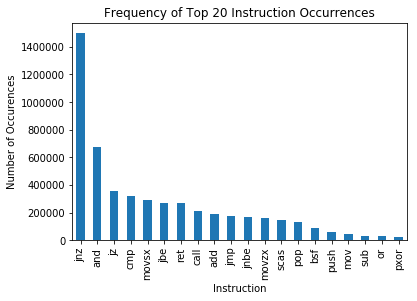

In [69]:
cursor.execute("""SELECT instruction FROM instruction_history;""")
rows = cursor.fetchall()
df = pd.DataFrame(rows)
instruction_frequency = pd.DataFrame(df[0].value_counts())
instruction_frequency.head(20).plot.bar()
plt.title('Frequency of Top 20 Instruction Occurrences')
plt.xlabel('Instruction')
plt.ylabel('Number of Occurences')
plt.legend().set_visible(False)

### Finding Patterns in the Branch Outcomes

In [46]:
# Get the branch ID and Branch outcome for every branch in an execution
execution_id = 3
cursor.execute("""SELECT branch_id, branch_outcome FROM branch_history WHERE execution_id={};""".format(execution_id))
branch_data = pd.DataFrame(cursor.fetchall())
# This is a list of all the outcomes of a branch in the order of branch_id
branch_outcomes = pd.DataFrame(branch_data[1])
# Now find the instruction history register status for every branch_id
instruction_history = pd.DataFrame()
for branch_id in branch_data[0]:
    cursor.execute("""SELECT instruction FROM instruction_history WHERE execution_id={} AND branch_id={};""".format(execution_id, branch_id))
    df = pd.DataFrame(cursor.fetchall())
    instruction_history = instruction_history.append(df.transpose())

# Displays the first 30 instructions
instruction_history.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,push,jnz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,push,mov,call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,push,mov,call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,push,mov,call,push,push,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,push,mov,call,push,push,push,jmp,mov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
execution_id = 3
cursor.execute("""SELECT branch_id, branch_outcome FROM branch_history WHERE execution_id={};""".format(execution_id))
branch_data = pd.DataFrame(cursor.fetchall())

branch_outcomes = pd.DataFrame(branch_data[1])

results = []

for branch_id in branch_data[0]:
    cursor.execute("""SELECT instruction FROM instruction_history WHERE execution_id={} AND branch_id={};""".format(execution_id, branch_id))
    df = pd.DataFrame(cursor.fetchall())
    results.append(df.transpose())

instruction_history_2 = pd.concat(results)
instruction_history_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,push,jnz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,push,jnz,jz,jle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
instruction_history.equals(instruction_history_2)

True

In [7]:
branch_outcomes.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386
1,False,True,False,True,False,True,False,True,False,False,...,True,False,True,False,False,True,False,True,False,True


In [8]:
#unique_row_counts = instruction_history.groupby(df.columns.tolist(),as_index=False)
unique_branches = instruction_history.drop_duplicates()
print('Number of total branches: {}'.format(instruction_history.shape[0]))
print('Number of unqiue branches: {}'.format(unique_branches.shape[0]))
print('Percentage of duplicate branches: {0:.2f}%'.format(unique_branches.shape[0]/instruction_history.shape[0]*100))

Number of total branches: 1387
Number of unqiue branches: 619
Percentage of duplicate branches: 44.63%


### Creating the Instruction Lookup
This allows conversion from the dataframe's instruction mnemonics to an underlying opcode.

In [9]:
import xml.etree.ElementTree as ET

tree = ET.parse('Resources/X86.xml')
root = tree.getroot()

instruction_lookup = {}

# Get all of the single byte instructions
for operation in root.find('one-byte'):
    opcode = operation.attrib['value']
    mnem = operation.find('entry').find('syntax').find('mnem')
    if mnem is not None:
        instruction_lookup[mnem.text.lower()] = int(opcode, 16)

In [10]:
def convertInstructions(inst):
    opcode = None 
    try:
        opcode = instruction_lookup[inst]
    except KeyError:
        opcode = -1
    return opcode

In [11]:
# Example of converting a row of the instruction list
X = instruction_history.applymap(convertInstructions)
#converted = convertInstructions(instruction_history.iloc[40])

y = branch_outcomes
print(X.shape)
print(y.shape)

X.head(30)

(1387, 20)
(1387, 1)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,106,117,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,106,199,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,106,199,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,106,199,232,106,106,106,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,106,117,116,126,106,199,232,106,106,106,235,199,-1,-1,-1,-1,-1,-1,-1,-1


In [34]:
y.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576
1,False,True,False,True,False,True,False,True,False,False,...,True,False,True,False,False,True,False,True,False,True


### Training an MLP with the Sourced and Converted Data

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X.values, y.transpose().values[0])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
for i in range(0, X.shape[0]):
    if(clf.predict(pd.DataFrame(X.iloc[i]).transpose())[0]):
        print("Predicted True at {}".format(i))

Predicted True at 532
Predicted True at 533
Predicted True at 624
Predicted True at 625


#### Different MLP Configuration

In [15]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13, 13), random_state=1)
clf2.fit(X.values, y.transpose().values[0])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
for i in range(0, X.shape[0]):
    if(clf2.predict(pd.DataFrame(X.iloc[i]).transpose())[0]):
        print("Predicted True at {}".format(i))

Predicted True at 1097
Predicted True at 1098


In [17]:
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1)
clf3.fit(X.values, y.transpose().values[0])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
clf4 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(130, 130), random_state=1)
clf4.fit(X.values, y.transpose().values[0])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(130, 130), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [19]:
for i in range(0, X.shape[0]):
    if(clf4.predict(pd.DataFrame(X.iloc[i]).transpose())[0]):
        print("Predicted True at {}".format(i))

Predicted True at 2
Predicted True at 3
Predicted True at 4
Predicted True at 5
Predicted True at 43
Predicted True at 44
Predicted True at 45
Predicted True at 46
Predicted True at 52
Predicted True at 53
Predicted True at 70
Predicted True at 71
Predicted True at 94
Predicted True at 95
Predicted True at 99
Predicted True at 100
Predicted True at 110
Predicted True at 111
Predicted True at 127
Predicted True at 128
Predicted True at 137
Predicted True at 138
Predicted True at 194
Predicted True at 195
Predicted True at 196
Predicted True at 197
Predicted True at 243
Predicted True at 244
Predicted True at 245
Predicted True at 246
Predicted True at 247
Predicted True at 248
Predicted True at 259
Predicted True at 260
Predicted True at 267
Predicted True at 268
Predicted True at 288
Predicted True at 289
Predicted True at 303
Predicted True at 304
Predicted True at 305
Predicted True at 306
Predicted True at 307
Predicted True at 308
Predicted True at 335
Predicted True at 336
Predict

### Comparison of Trained Classifiers

In [20]:
# Get the Test Data
# Get the branch ID and Branch outcome for every branch in an execution
execution_id = 4
cursor.execute("""SELECT branch_id, branch_outcome FROM branch_history WHERE execution_id={};""".format(execution_id))
branch_data = pd.DataFrame(cursor.fetchall())
# This is a list of all the outcomes of a branch in the order of branch_id
branch_outcomes = pd.DataFrame(branch_data[1])
# Now find the instruction histroy register status for every branch_id
instruction_history = pd.DataFrame()
for branch_id in branch_data[0]:
    cursor.execute("""SELECT instruction FROM instruction_history WHERE execution_id={} AND branch_id={};""".format(execution_id, branch_id))
    df = pd.DataFrame(cursor.fetchall())
    instruction_history = instruction_history.append(df.transpose())

# Displays the first 30 instructions
instruction_history.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,call,mov,cmp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,call,push,call,mov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
instruction_history.index = pd.RangeIndex(len(instruction_history.index))

instruction_history.index = range(len(instruction_history.index))

subset = list(range(50, 70))
print(instruction_history.loc[subset].to_latex())

\begin{tabular}{lllllllllllllllllllll}
\toprule
{} &    0  &   1  &   2  &   3  &    4  &    5  &   6  &   7  &   8  &   9  &   10 &    11 &   12 &   13 &    14 &    15 &    16 &   17 &    18 &   19 \\
\midrule
50 &   pop &  ret &  jmp &  jmp &   jmp &  push &  cmp &  pop &  ret &  jmp &  mov &   mov &  pop &  ret &    or &   jmp &   cmp &  pop &   ret &  jmp \\
51 &   pop &  ret &  jmp &  jmp &   jmp &  push &  cmp &  pop &  ret &  jmp &  mov &   mov &  pop &  ret &    or &   jmp &   cmp &  pop &   ret &  jmp \\
52 &  push &  cmp &  pop &  ret &   jmp &   mov &  mov &  pop &  ret &   or &  jmp &   cmp &  pop &  ret &   jmp &   mov &   mov &  mov &   pop &  ret \\
53 &  push &  cmp &  pop &  ret &   jmp &   mov &  mov &  pop &  ret &   or &  jmp &   cmp &  pop &  ret &   jmp &   mov &   mov &  mov &   pop &  ret \\
54 &   jmp &  mov &  mov &  pop &   ret &    or &  jmp &  cmp &  pop &  ret &  jmp &   mov &  mov &  mov &   pop &   ret &   cmp &  pop &   ret &  jmp \\
55 &   mov &  mov &

In [21]:
# Example of converting a row of the instruction list
X = instruction_history.applymap(convertInstructions)
#converted = convertInstructions(instruction_history.iloc[40])

y = branch_outcomes
print(X.shape)
print(y.shape)

X.head(30)

(1577, 20)
(1577, 1)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,232,199,61,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,232,106,232,199,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [63]:
X.index = pd.RangeIndex(len(X.index))

X.index = range(len(X.index))

subset = list(range(50, 70))
print(X.loc[subset].to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 &   16 &   17 &   18 &   19 \\
\midrule
50 &   61 &  117 &  199 &  117 &  235 &   61 &  117 &  199 &   61 &  117 &  199 &  235 &   53 &  117 &  131 &  235 &  235 &   61 &  131 &  117 \\
51 &   61 &  117 &  199 &  117 &  235 &   61 &  117 &  199 &   61 &  117 &  199 &  235 &   53 &  117 &  131 &  235 &  235 &   61 &  131 &  117 \\
52 &  117 &  199 &  235 &   53 &  117 &  131 &  235 &  235 &   61 &  131 &  117 &  106 &  106 &  106 &  117 &  117 &  117 &   -1 &   -1 &  106 \\
53 &  199 &  235 &   53 &  117 &  131 &  235 &  235 &   61 &  131 &  117 &  106 &  106 &  106 &  117 &  117 &  117 &   -1 &   -1 &  106 &  235 \\
54 &  199 &  235 &   53 &  117 &  131 &  235 &  235 &   61 &  131 &  117 &  106 &  106 &  106 &  117 &  117 &  117 &   -1 &   -1 &  106 &  235 \\
55 &  235 &  235 &   61 &  131 &  117 &  106 &  106 &  106 &  117 &

In [22]:
results = []
classifiers = [clf, clf2, clf3, clf4]
for classifier in classifiers:
    correct   = 0
    incorrect = 0
    for i in range(0, X.shape[0]):
        predicted = classifier.predict(pd.DataFrame(X.iloc[i]).transpose())[0]
        expected  = y.iloc[0].values[0]
        if(predicted == expected):
            correct += 1
        else:
            incorrect += 1       
    #Save the predictors results in a list
    results.append({'correct':correct, 'incorrect':incorrect})

print(results)

[{'correct': 1577, 'incorrect': 0}, {'correct': 1577, 'incorrect': 0}, {'correct': 1536, 'incorrect': 41}, {'correct': 1366, 'incorrect': 211}]


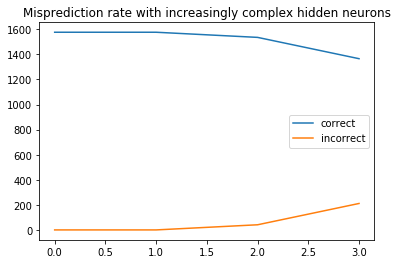

In [23]:
df = pd.DataFrame(results)
df.head()
df.plot.line(title='Misprediction rate with increasingly complex hidden neurons', )

In [24]:
for i in results:
    print('Misprediction rate for classifier is {0:.2f}%'.format(i['incorrect']/(i['incorrect']+i['correct'])*100))

Misprediction rate for classifier is 0.00%
Misprediction rate for classifier is 0.00%
Misprediction rate for classifier is 2.60%
Misprediction rate for classifier is 13.38%


#### Next...

In [25]:
from sklearn.externals import joblib
joblib.dump(classifiers[0], 'saved_mlp.pkl')

['saved_mlp.pkl']

In [26]:
clf_loaded = joblib.load('saved_mlp.pkl')

In [32]:
for i in range(0, X.shape[0]):
        predicted = clf_loaded.predict(pd.DataFrame(X.iloc[i]).transpose())[0]